***
MNIST Model Creation
***

*By Jared Kelnhofer, 10-02-2020*

The purpose of this portion of the project is to create a model that can accurately categorize handwritten digits. This model will then be used in the main body of the project. I'll be using the MNIST handwritten digit dataset, and saving it in the /Dataset directory which is in the same directory as this notebook. TODO: add a way to load the local dataset instead of downloading it!

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os
if not os.path.exists('./Dataset'):
    os.makedirs('./Dataset')

from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", version=1, data_home="./Dataset")

Now I'll check out the MNIST dataset, and gain some insight on how it is structured:

In [2]:
print(mnist.keys())
print("Shape of \"data\" key: " + str(np.shape(mnist.data)))
print("Shape of \"target\" key: " + str(np.shape(mnist.target)))

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])
Shape of "data" key: (70000, 784)
Shape of "target" key: (70000,)


Sicne the square root of 784 is 28, I'm going to assume that the images are 28 by 28 pixels. I'm not sure why they're not stored in a 3d vector, but it doesn't really matter. Numpy has a function "reshape" that will let me change the shape of the 1D vector representing any image into a 28 by 28 matrix, and thus view it.

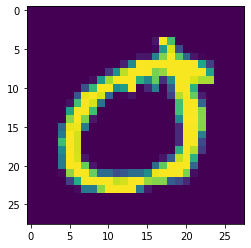

Label: 0


In [3]:
import random

index = random.randint(0, 70000)

test_image = mnist.data[index]
test_image = test_image.reshape(28, 28)

plt.imshow(test_image)
plt.show()

print("Label: " + mnist.target[index])

Now it's time to split up the data into the training and test sets. MNIST has the last 10,000 images set aside as testing images, and the same goes for the target labels. MNIST comes pre-shuffled, so I don't have to worry about stratified splitting.

In [13]:
X_train = mnist.data[:60000]
X_test = mnist.data[60000:]
Y_train = mnist.target[:60000]
Y_test = mnist.target[60000:]

print("X_train shape: " + str(np.shape(X_train)))
print("X_test shape: " + str(np.shape(X_test)))
print("Y_train shape: " + str(np.shape(Y_train)))
print("Y_test shape: " + str(np.shape(Y_test)))

X_train shape: (60000, 784)
X_test shape: (10000, 784)
Y_train shape: (60000,)
Y_test shape: (10000,)


Now all I need to do is create a model that can categorize the data with at least 97% accuracy, and test it to make sure I am not overfitting. Then I'll save the model, and move on to the rest of this project!

In [14]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)

DecisionTreeClassifier()

Let's see how well that worked! I might have to do some hyperparameter tuning or cross-validation or something.

In [19]:
Y_predict = tree.predict(X_test)

Aight, let's see a confusion matrix that compares the actual labels of our test data to the model's predictions. While we're at it, let's check out the accuracy and loss of the model.

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_predict)

print("")#find accuracy!

array([[ 915,    0,    8,    6,    5,   13,   12,    5,   10,    6],
       [   2, 1092,   11,    3,    2,    7,    5,    4,    8,    1],
       [  13,    7,  887,   31,   10,   15,   12,   25,   24,    8],
       [   8,    6,   30,  863,    4,   40,    1,    7,   27,   24],
       [   3,    6,    9,    1,  864,   10,   14,    6,   20,   49],
       [  12,    9,    4,   42,    9,  746,   24,    3,   24,   19],
       [  15,    3,   12,    5,   16,   21,  853,    0,   30,    3],
       [   2,   12,   25,   15,    7,    7,    3,  927,    8,   22],
       [  11,    8,   31,   36,   24,   27,   17,    6,  786,   28],
       [  13,    5,    5,   20,   45,   15,    6,   17,   29,  854]])